<a href="https://colab.research.google.com/github/fariz842-git/Quality-Control-in-manufacturing-/blob/main/quality%20control%20in%20manufacturing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

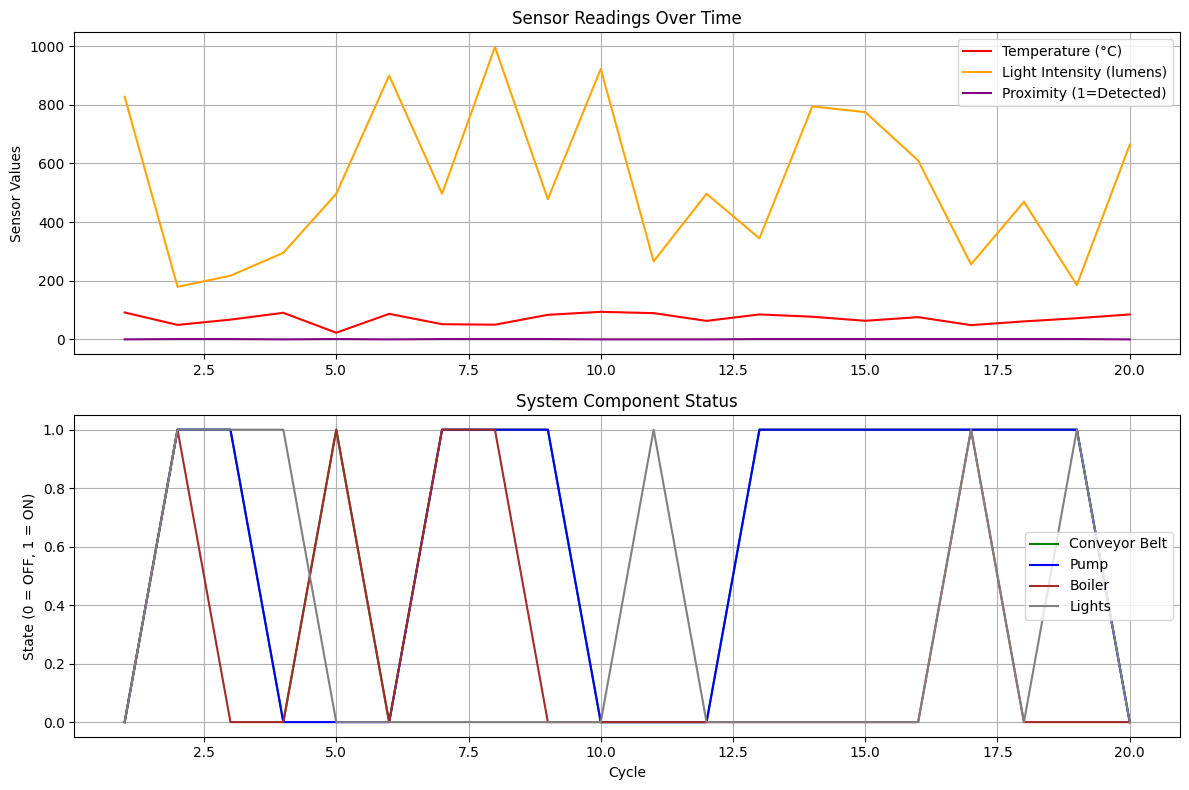

In [1]:
import random
import time
from typing import Dict, List
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Sensor simulation functions
def read_proximity_sensor() -> bool:
    return random.choice([True, False])

def read_temperature_sensor() -> float:
    return random.uniform(20, 100)

def read_light_sensor() -> float:
    return random.uniform(100, 1000)

# Rule-based controller class
class SmartConveyorController:
    def __init__(self, temp_threshold_high=40, temp_threshold_low=60, light_threshold=300):
        self.temp_high = temp_threshold_high
        self.temp_low = temp_threshold_low
        self.light_thresh = light_threshold

    def evaluate(self, proximity: bool, temperature: float, light: float) -> Dict[str, int]:
        conveyor_on = int(proximity)
        pump_on = int(proximity and temperature > self.temp_high)
        boiler_on = int(proximity and temperature < self.temp_low)
        lights_on = int(light < self.light_thresh)

        return {
            "Conveyor Belt": conveyor_on,
            "Pump": pump_on,
            "Boiler": boiler_on,
            "Lights": lights_on
        }

# Simulation loop with plotting
def run_simulation(cycles: int = 20, delay: float = 0.1):
    controller = SmartConveyorController()

    # Data storage
    temperatures, lights, proximities = [], [], []
    conveyor_states, pump_states, boiler_states, light_states = [], [], [], []

    for cycle in range(cycles):
        proximity = read_proximity_sensor()
        temperature = read_temperature_sensor()
        light = read_light_sensor()

        status = controller.evaluate(proximity, temperature, light)

        # Store sensor data
        temperatures.append(temperature)
        lights.append(light)
        proximities.append(int(proximity))

        # Store system state
        conveyor_states.append(status["Conveyor Belt"])
        pump_states.append(status["Pump"])
        boiler_states.append(status["Boiler"])
        light_states.append(status["Lights"])

        time.sleep(delay)

    # Plotting
    clear_output(wait=True)
    x = list(range(1, cycles + 1))
    fig, axs = plt.subplots(2, 1, figsize=(12, 8))

    # Sensor values
    axs[0].plot(x, temperatures, label='Temperature (°C)', color='red')
    axs[0].plot(x, lights, label='Light Intensity (lumens)', color='orange')
    axs[0].plot(x, proximities, label='Proximity (1=Detected)', color='purple')
    axs[0].set_title("Sensor Readings Over Time")
    axs[0].set_ylabel("Sensor Values")
    axs[0].legend()
    axs[0].grid(True)

    # System status (binary states)
    axs[1].plot(x, conveyor_states, label='Conveyor Belt', color='green')
    axs[1].plot(x, pump_states, label='Pump', color='blue')
    axs[1].plot(x, boiler_states, label='Boiler', color='brown')
    axs[1].plot(x, light_states, label='Lights', color='gray')
    axs[1].set_title("System Component Status")
    axs[1].set_xlabel("Cycle")
    axs[1].set_ylabel("State (0 = OFF, 1 = ON)")
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Run the simulation
run_simulation()